<a href="https://colab.research.google.com/github/Abash05/Kaggle-Team-1---Digital-Habits-and-Mental-Health/blob/sleep_clean/Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

files.upload()

Saving Data.csv to Data.csv


{'Data.csv': b'id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score\n1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,98,34,7.0,9.12379996856656,3.353627229065094,9.926651431001652,5.0,6.593288791385255,8.0,23.0,0,Android,70.0,25.7\n2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,174,102,2.0,8.83751689466956,2.90814688427508,4.0,4.0,4.126925580981799,8.1,35.0,0,Laptop,64.0,30.1\n3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,595,140,1.0,6.486743490405938,2.8892134520710853,4.0,8.0,1.4291394113837326,7.6,15.0,0,Android,65.29930112427833,40.6\n4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,18,121,4.0,7.600503916041014,3.09748813248978

In [3]:
df = pd.read_csv("Data.csv")

# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3500, 24)


,id,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,...,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,device_type,productivity_score,digital_dependence_score
0,1,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,...,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,Android,70.000000,25.700000
1,2,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,...,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,Laptop,64.000000,30.100000
2,3,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,...,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,Android,65.299301,40.600000
3,4,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,...,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,Tablet,80.000000,36.684152
4,5,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,...,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,Android,65.299301,48.400000


In [4]:
# Count missing values and duplicates
missing = df.isnull().sum().sort_values(ascending=False)
dups = df.duplicated().sum()

print("Missing values per column:\n", missing)
print("\nDuplicate rows:", dups)

# Show barplot only if there are missing values
missing_nonzero = missing[missing > 0]

if len(missing_nonzero) > 0:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_nonzero.index, y=missing_nonzero.values, palette="crest")
    plt.title("Missing values per column (only non-zero)")
    plt.xlabel("Column")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Missing values per column:
 id                          0
age                         0
gender                      0
region                      0
income_level                0
education_level             0
daily_role                  0
device_hours_per_day        0
phone_unlocks               0
notifications_per_day       0
social_media_mins           0
study_mins                  0
physical_activity_days      0
sleep_hours                 0
sleep_quality               0
anxiety_score               0
depression_score            0
stress_level                0
happiness_score             0
focus_score                 0
high_risk_flag              0
device_type                 0
productivity_score          0
digital_dependence_score    0
dtype: int64

Duplicate rows: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        3500 non-null   int64  
 1   age                       3500 non-null   int64  
 2   gender                    3500 non-null   object 
 3   region                    3500 non-null   object 
 4   income_level              3500 non-null   object 
 5   education_level           3500 non-null   object 
 6   daily_role                3500 non-null   object 
 7   device_hours_per_day      3500 non-null   float64
 8   phone_unlocks             3500 non-null   int64  
 9   notifications_per_day     3500 non-null   int64  
 10  social_media_mins         3500 non-null   int64  
 11  study_mins                3500 non-null   int64  
 12  physical_activity_days    3500 non-null   float64
 13  sleep_hours               3500 non-null   float64
 14  sleep_qu

In [6]:
df.describe()

,id,age,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,study_mins,physical_activity_days,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,28.078571,7.317677,147.107429,335.117143,159.362857,108.116571,3.350000,7.254481,2.708848,7.183858,8.830000,5.076560,6.418568,41.598600,0.201429,65.299301,36.684152
std,1010.507298,9.352385,3.239838,67.770656,239.678612,132.748048,79.796273,1.877976,1.291879,1.101105,5.043220,5.738959,3.403503,3.019828,23.764574,0.401125,9.664716,14.115504
min,1.000000,13.000000,0.280000,9.000000,22.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33.000000,5.600000
25%,875.750000,21.000000,4.867500,96.000000,170.000000,68.000000,42.000000,2.000000,6.410545,1.919438,4.000000,4.000000,1.341488,4.000000,24.750000,0.000000,59.000000,26.200000
50%,1750.500000,27.000000,6.760000,136.000000,268.000000,119.000000,102.000000,3.000000,7.291580,2.907819,6.000000,8.000000,4.809726,7.500000,44.000000,0.000000,65.299301,35.300000
75%,2625.250000,34.000000,9.152500,187.000000,434.000000,204.000000,163.000000,5.000000,8.162298,3.276968,8.845008,13.000000,8.794302,8.900000,59.000000,0.000000,71.000000,45.100000
max,3500.000000,50.000000,17.160000,374.000000,1211.000000,631.000000,418.000000,7.000000,11.004566,5.000000,27.154217,27.000000,10.000000,10.000000,100.000000,1.000000,95.000000,89.200000


In [7]:
df = df.drop(columns = ['id', 'device_type'])
df.head()

,age,gender,region,income_level,education_level,daily_role,device_hours_per_day,phone_unlocks,notifications_per_day,social_media_mins,...,sleep_hours,sleep_quality,anxiety_score,depression_score,stress_level,happiness_score,focus_score,high_risk_flag,productivity_score,digital_dependence_score
0,40,Female,Asia,High,High School,Part-time/Shift,3.54,45,561,98,...,9.123800,3.353627,9.926651,5.0,6.593289,8.0,23.0,0,70.000000,25.700000
1,27,Male,Africa,Lower-Mid,Master,Full-time Employee,5.65,100,393,174,...,8.837517,2.908147,4.000000,4.0,4.126926,8.1,35.0,0,64.000000,30.100000
2,31,Male,North America,Lower-Mid,Bachelor,Full-time Employee,8.87,181,231,595,...,6.486743,2.889213,4.000000,8.0,1.429139,7.6,15.0,0,65.299301,40.600000
3,41,Female,Middle East,Low,Master,Caregiver/Home,4.05,94,268,18,...,7.600504,3.097488,7.093357,9.0,4.995512,7.8,28.0,1,80.000000,36.684152
4,26,Female,Europe,Lower-Mid,Bachelor,Full-time Employee,13.07,199,91,147,...,5.197962,2.786098,7.028125,15.0,9.448757,4.2,70.0,1,65.299301,48.400000


In [8]:
df['sleep_hours'].describe()

,sleep_hours
count,3500.000000
mean,7.254481
std,1.291879
min,3.000000
25%,6.410545
50%,7.291580
75%,8.162298
max,11.004566


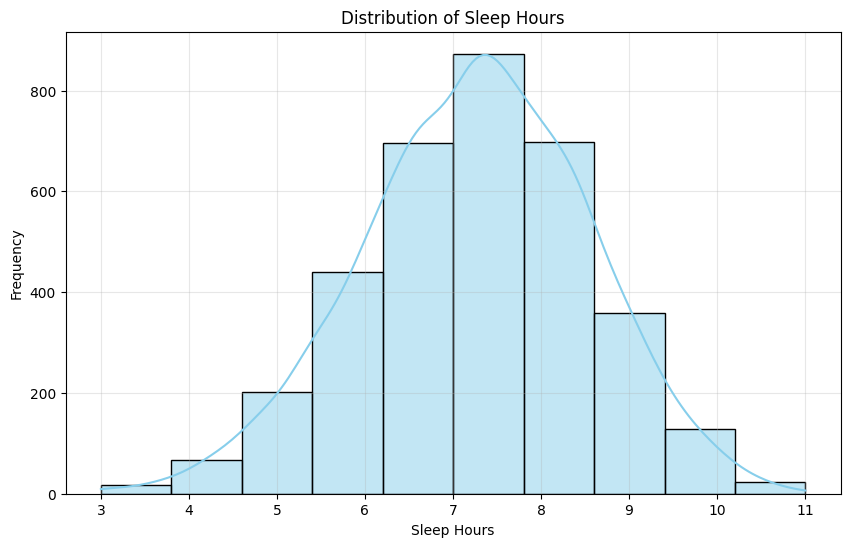

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['sleep_hours'], kde=True, bins=10, color="skyblue")
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

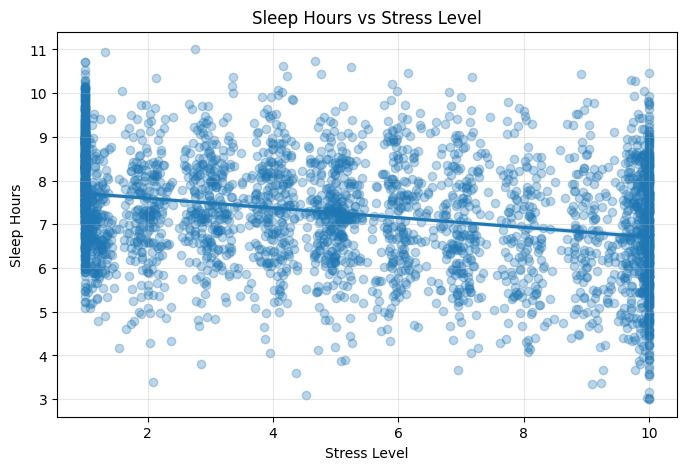

,sleep_hours,stress_level
sleep_hours,1.000000,-0.291708
stress_level,-0.291708,1.000000


In [10]:
plt.figure(figsize=(8,5))
sns.regplot(x='stress_level', y='sleep_hours', data=df, scatter_kws={'alpha':0.3})
plt.title("Sleep Hours vs Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours")
plt.grid(alpha=0.3)
plt.show()

df[['sleep_hours', 'stress_level']].corr()

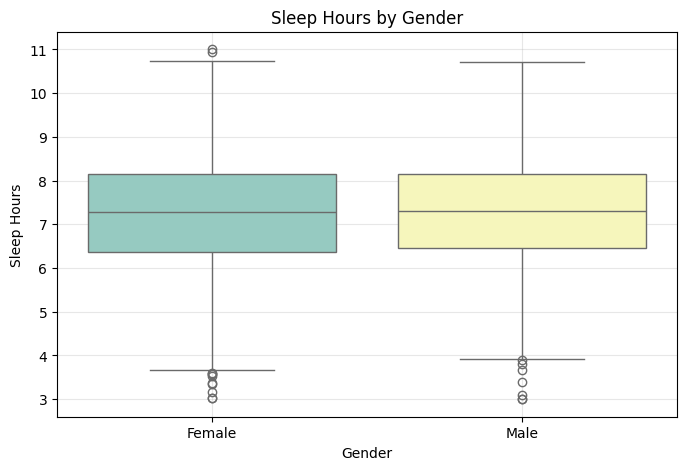

In [11]:
if 'gender' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='gender', y='sleep_hours', data=df, palette='Set3')
    plt.title("Sleep Hours by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Sleep Hours")
    plt.grid(alpha=0.3)
    plt.show()

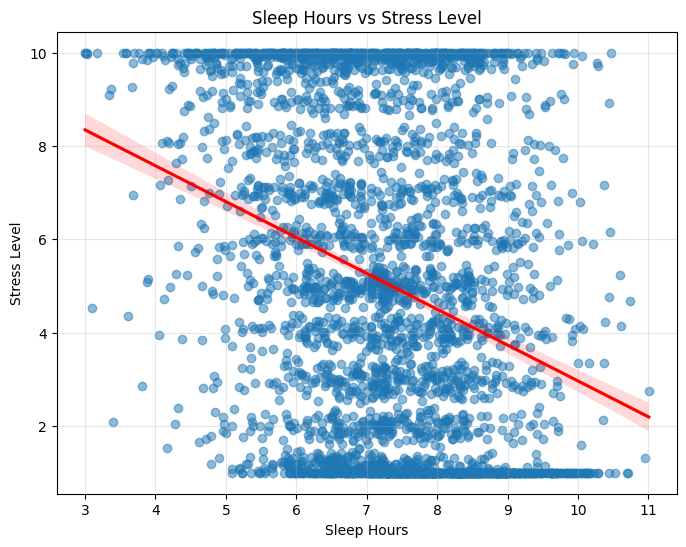

,sleep_hours,stress_level
sleep_hours,1.000000,-0.291708
stress_level,-0.291708,1.000000


In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_hours', y='stress_level', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Sleep Hours vs Stress Level")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.grid(alpha=0.3)
plt.show()

df[['sleep_hours', 'stress_level']].corr()


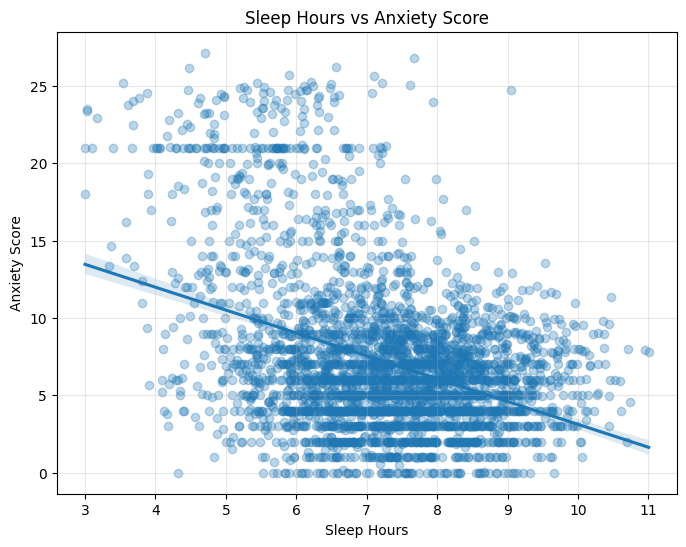

,sleep_hours,anxiety_score
sleep_hours,1.000000,-0.378569
anxiety_score,-0.378569,1.000000


In [13]:
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_hours', y='anxiety_score', data=df, scatter_kws={'alpha':0.3})
plt.title("Sleep Hours vs Anxiety Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Anxiety Score")
plt.grid(alpha=0.3)
plt.show()

df[['sleep_hours', 'anxiety_score']].corr()

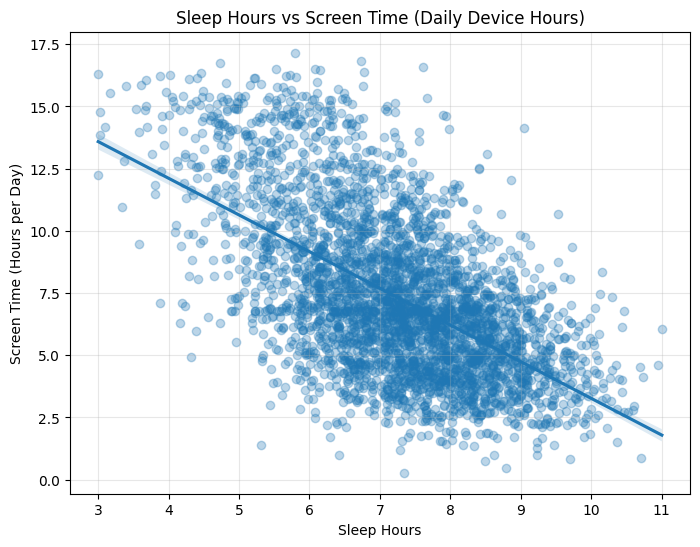

,sleep_hours,device_hours_per_day
sleep_hours,1.000000,-0.587631
device_hours_per_day,-0.587631,1.000000


In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='sleep_hours', y='device_hours_per_day', data=df, scatter_kws={'alpha':0.3})
plt.title("Sleep Hours vs Screen Time (Daily Device Hours)")
plt.xlabel("Sleep Hours")
plt.ylabel("Screen Time (Hours per Day)")
plt.grid(alpha=0.3)
plt.show()

df[['sleep_hours', 'device_hours_per_day']].corr()

In [15]:
bins = [0, 5, 7, 9, 24]
labels = ['<5 hours', '5-7 hours', '7-9 hours', '>9 hours']
df['sleep_group'] = pd.cut(df['sleep_hours'], bins=bins, labels=labels, right=False)

df[['sleep_hours', 'sleep_group']].head()

,sleep_hours,sleep_group
0,9.123800,>9 hours
1,8.837517,7-9 hours
2,6.486743,5-7 hours
3,7.600504,7-9 hours
4,5.197962,5-7 hours


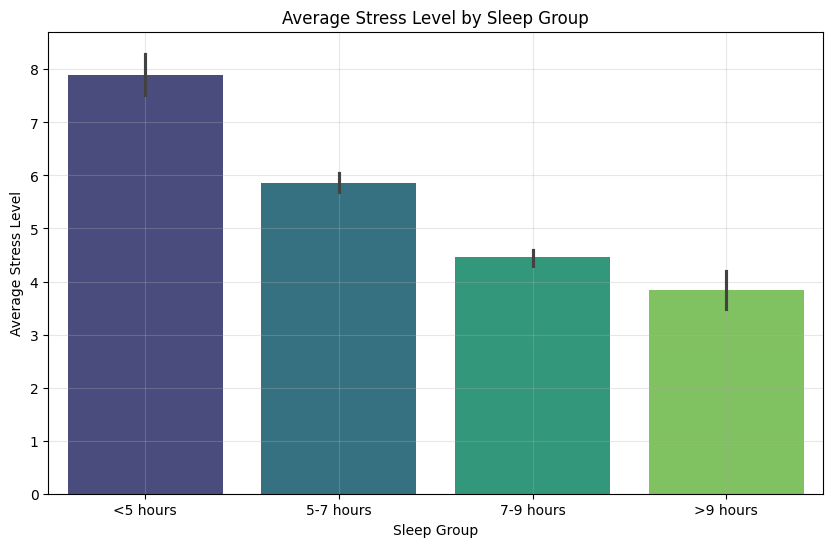

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='sleep_group', y='stress_level', data=df, estimator=np.mean, palette='viridis')
plt.title("Average Stress Level by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Average Stress Level")
plt.grid(alpha=0.3)
plt.show()


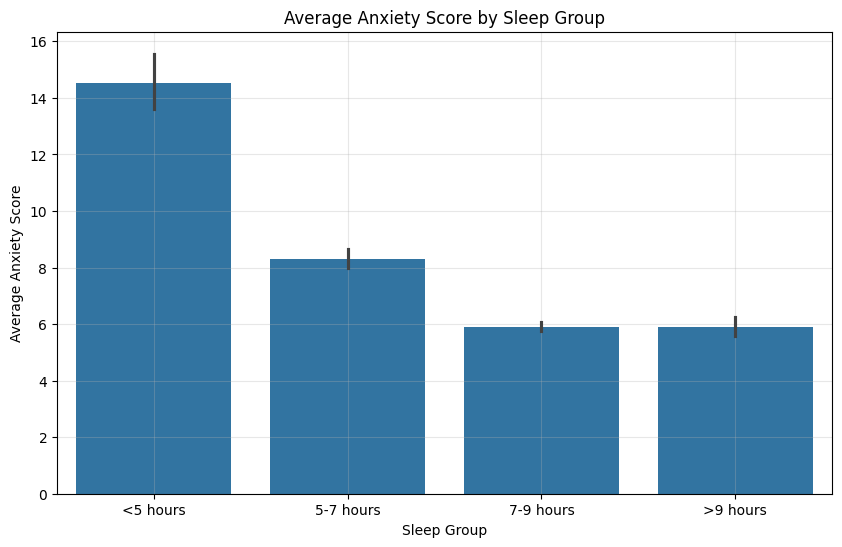

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='sleep_group', y='anxiety_score', data=df, estimator=np.mean)
plt.title("Average Anxiety Score by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Average Anxiety Score")
plt.grid(alpha=0.3)
plt.show()